In [1]:
import json
import datetime
import math

workers = 0
questions = 0
answers = 0
with open('../Downloads/workers.json') as f:
    workers = json.load(f)
with open('../Downloads/questions.json') as f2:
    questions = json.load(f2)

In [2]:
#sort for workers who enter and leave after the whole time
def get_timed_workers(workers):
    ids = []
    for entry in workers:
        worker_id = entry['id']
        if len(entry['time_left']) == len(entry['time_entered']) and len(entry['time_entered']) >0:
            ids.append(worker_id)
    return ids

In [3]:
ft = get_timed_workers(workers)
print('full timers', ft)

full timers ['A38DC3BG1ACVZ2', 'Z38DC3BG1ZCVZ2', '1234567X901234', 'A3HZFB2JLF3JMY', 'A3T1M3NZ5UIA56', 'A2YO837C0O1E91', 'A2J3M47NIOC1MC', 'A1RFECS63DTC3U', 'A3QOMMIZTW0XF1', 'A11X5M6KPGSTTC', 'AZ0VPYLKIPMRF', 'A1PUSSRD8P5HHH', '123456PJ901234', 'A1DQ5LRPJJLHHJ', 'A34SLWTNACPBMO', 'A3A3R002WFC7U3', 'A1WT9J6TTJDLKN', 'A354IONQNVAG91', 'A2WI5DVHW58TY4', 'ADVJB810K4OYR', 'ATYC149F9CG7M', 'A1VOTY43NOW4MW', 'AT6ICEVY8RM8D', 'A22EUHQ13BXM5D', 'A2MHLDP4G78P23', 'A1CQDLI6UA2IW4', 'A3IXJO2X4M1D7U', 'A1UOH37J26WEBR', 'A25HPJJ60WOVPZ', 'A25YHJE4ME90MI', 'A24SLIUJ4YTF1Y', 'A1QCTGDWPL7F5G', 'A1W37DN2IF8QXV', 'A3E9QUHIGN6STZ', 'A2I2WHPHIA9CZG', 'ALZCIZPZ5W444', 'A1YIGXBU6FQQ6C', 'AO2WNSGOXAX52', 'A11W99OO65FV4K', 'AKXJDNVRKOMKM', 'A3U1FJMSEUIH8K', 'AQB0TQPOGOFQE', 'A6Q8KZ37WBAZ1', 'A3RBC5DVESRSEB', 'A1E6X3813407HB', 'A11EMIH2OX2WCH', 'A1NBX5TZHF8UBY', 'A1Q56N80RJLQ7S', 'A3QYX9IDK31G78', 'AI0TZEH5DNODH', 'A16XI3JQN3EWLZ', 'ASH7SVFWH0KT1', 'A3JPTLJNNUWTVI', 'A39BAMDJ0EJ78Z', 'A3737WAE5ECT0M', '1234567

In [4]:
reduced = [w for w in workers if w['id'] in ft]

In [5]:
id = 'A3HZFB2JLF3JMY'
for x in reduced:
    if x['id'] == id:
        print(x)

{'_id': {'$oid': '6092a90651888c0004b59dd2'}, 'time_entered': [{'$date': '2021-05-05T14:17:42.620Z'}], 'time_left': [{'$date': '2021-05-05T14:19:23.841Z'}], 'id': 'A3HZFB2JLF3JMY', 'qs_answered': [{'_id': {'$oid': '6092a93151888c0004b59dd6'}, 'id': 0, 'time': {'$date': '2021-05-05T14:18:25.661Z'}, 'answer': 1}], 'createdAt': {'$date': '2021-05-05T14:17:42.622Z'}, 'updatedAt': {'$date': '2021-05-05T14:19:23.841Z'}, '__v': 0}


In [6]:
def get_full_time_workers(workers, ft, percentage_full_time, full_time_duration):
    worker_times = {}
    for entry in workers:
        worker_id = entry['id']
        if worker_id in ft:
            enters = entry['time_entered']
            lefts = entry['time_left']
            for ix, e in enumerate(enters):
                enter = datetime.datetime.strptime(e['$date'], '%Y-%m-%dT%H:%M:%S.%fZ')
                left = datetime.datetime.strptime(lefts[ix]['$date'], '%Y-%m-%dT%H:%M:%S.%fZ')
                duration = left - enter
                if worker_id not in worker_times.keys():
                    worker_times[worker_id] = []
                worker_times[worker_id].append(duration)
    good_workers = []
    for w, l in worker_times.items():
        total = len(l)
        count = 0
        for x in l:
            time = x.total_seconds()
            if time > full_time_duration*60:
                count += 1
        if count/total >= percentage_full_time:
            good_workers.append(w)
#         else:
#             print(w)
    return good_workers

full_workers = get_full_time_workers(workers,ft, .7, 25)
len(full_workers)

40

In [7]:
full_time_workers = [w for w in reduced if w['id'] in full_workers]

In [8]:
#number of questions answered by each worker who worked full time
for worker in full_time_workers:
    print(len(worker['qs_answered']))

48
32
37
16
12
21
29
24
21
26
20
18
5
17
16
6
6
0
14
12
17
14
12
24
9
11
11
10
13
0
0
0
7
7
7
0
7
5
5
3


In [9]:
def get_time_quality_workers(full_time_workers):
    l = []
    for worker in full_time_workers:
        if len(worker['qs_answered']) > 5:
            l.append(worker['id'])
    return l
            

quality_workers = get_time_quality_workers(full_time_workers)
len(quality_workers)

31

In [10]:
quality_worker_info = [w for w in full_time_workers if w['id'] in quality_workers]

In [11]:
def get_majority_votes(questions):
    results = {}
    for question in questions:
        code = question['qID']
        if code not in results:
            votes = [a['answer'] for a in question['votes']]
            results[code] = 1 if votes.count(1) >= votes.count(2) else 2
    return results

In [12]:
votes = get_majority_votes(questions)

In [13]:
def get_final_outcome(questions):
    results = {}
    for question in questions:
        code = question['qID']
        if code not in results:
            results[code] = question['true_answer']
    return results

In [14]:
true_answer = get_final_outcome(questions)

In [15]:
simple_votes = get_majority_votes(questions)

In [16]:
sm_agree_count = 0
for k in simple_votes.keys():
    if simple_votes[k] == true_answer[k]:
        sm_agree_count += 1
sm_agree_count/len(simple_votes)


0.7642276422764228

In [17]:
copouts = ['good', 'nice', 'weird', 'bad']

In [18]:
def comment_quality(comment, user='-1'):
    comment = comment.strip().lower()
    score = math.log(len(comment.split(' ')) + 1)
    if comment in copouts:
        score /= 2
    if user in quality_workers:
        score *= 1.5
    return score

In [19]:
def get_quality_majority_votes(questions, worker_priority=False):
    results = {}
    for question in questions:
        code = question['qID']
        if code not in results:
            vs = []
            for v in question['votes']:
                vs.append((v['answer'], comment_quality(v['comments'], v['worker_id'] if worker_priority else '-1')))
            c1 = 0
            c2 = 0
            for x in vs:
                if x[0] == 1:
                    c1 += x[1]
                else:
                    c2 += x[1]
            results[code] = 1 if c1 >= c2 else 2
    return results

In [20]:
quality_votes = get_quality_majority_votes(questions)

In [21]:
qual_agree_count = 0
for k in quality_votes.keys():
    if quality_votes[k] == true_answer[k]:
        qual_agree_count += 1
qual_agree_count/len(quality_votes)

0.7804878048780488

In [22]:
quality_votes2 = get_quality_majority_votes(questions, True)

In [23]:
qual_agree_count2 = 0
for k in quality_votes2.keys():
    if quality_votes2[k] == true_answer[k]:
        qual_agree_count2 += 1
qual_agree_count2/len(quality_votes)

0.8130081300813008

In [24]:
#get workers who agree with the majority most often
def get_agreement_majority(questions, simple_votes):
    worker_agree = {}
    worker_total = {}
    for question in questions:
        qid = question['qID']
        votes = question['votes']
        for v in votes:
            w_id = v['worker_id']
            if w_id not in worker_agree.keys():
                worker_agree[w_id] = 0
            if w_id not in worker_total.keys():
                worker_total[w_id] = 0
            response = v['answer']
            vote = simple_votes[qid]
            worker_total[w_id] += 1
            if response == vote:
                worker_agree[w_id] += 1
    worker_percentages = [(wid, worker_agree[wid]/worker_total[wid]) for wid in worker_agree.keys()]
    worker_percentages = sorted(worker_percentages, key = lambda x: x[1], reverse = True)
    return worker_percentages

agreement_majority = get_agreement_majority(questions, simple_votes)
print('percent agreement majority', agreement_majority)

percent agreement majority [('A3HZFB2JLF3JMY', 1.0), ('A1DQ5LRPJJLHHJ', 1.0), ('A3A3R002WFC7U3', 1.0), ('A34SLWTNACPBMO', 1.0), ('A1WT9J6TTJDLKN', 1.0), ('ATYC149F9CG7M', 1.0), ('A304UJAE051J89', 1.0), ('A25YHJE4ME90MI', 1.0), ('A24SLIUJ4YTF1Y', 1.0), ('A1YIGXBU6FQQ6C', 1.0), ('AQB0TQPOGOFQE', 1.0), ('A3RBC5DVESRSEB', 1.0), ('AI0TZEH5DNODH', 1.0), ('A16XI3JQN3EWLZ', 1.0), ('ASH7SVFWH0KT1', 1.0), ('A1CX45M5UVAM9R', 1.0), ('A2HYYV0L5HT1IF', 1.0), ('A30PWMZ7YYT2AK', 1.0), ('A2VEXWRL8L31ZB', 1.0), ('AF1WAWGK3NIHN', 1.0), ('ALG1XBLARJ545', 1.0), ('A2JGWDPGYD5X0N', 1.0), ('ADCPL2HX8CB1U', 1.0), ('A3BC13IWNQPXYZ', 0.9090909090909091), ('A26OCSX1VUO9EV', 0.90625), ('A34T4R7G25LDJM', 0.8888888888888888), ('A12HQ561AI1UVY', 0.8823529411764706), ('A1CQDLI6UA2IW4', 0.8709677419354839), ('A34A8A4MZ1V53Y', 0.8666666666666667), ('A1B8BSFDFQJXSD', 0.8571428571428571), ('A3SI89EVITCXAW', 0.8571428571428571), ('A3GPYCHKB2KDLC', 0.8571428571428571), ('A3U7RDVJNFHHLZ', 0.8333333333333334), ('AO2WNSGOXAX52

In [25]:
#get workers who agree with the true outcome most often
def get_agreement_outcome(questions, true_answers):
    worker_agree = {}
    worker_total = {}
    for question in questions:
        qid = question['qID']
        votes = question['votes']
        for v in votes:
            w_id = v['worker_id']
            if w_id not in worker_agree.keys():
                worker_agree[w_id] = 0
            if w_id not in worker_total.keys():
                worker_total[w_id] = 0
            response = v['answer']
            vote = true_answers[qid]
            worker_total[w_id] += 1
            if response == vote:
                worker_agree[w_id] += 1
    worker_percentages = [(wid, worker_agree[wid]/worker_total[wid]) for wid in worker_agree.keys()]
    worker_percentages = sorted(worker_percentages, key = lambda x: x[1], reverse = True)
    return worker_percentages

agreement_outcome = get_agreement_outcome(questions, true_answer)
print('percent agreement majority', agreement_outcome)

percent agreement majority [('A3QOMMIZTW0XF1', 1.0), ('A1DQ5LRPJJLHHJ', 1.0), ('A3A3R002WFC7U3', 1.0), ('A34SLWTNACPBMO', 1.0), ('A1WT9J6TTJDLKN', 1.0), ('ATYC149F9CG7M', 1.0), ('A304UJAE051J89', 1.0), ('A25YHJE4ME90MI', 1.0), ('A1QCTGDWPL7F5G', 1.0), ('A1JG342PWI2PTC', 1.0), ('A1YIGXBU6FQQ6C', 1.0), ('A3RBC5DVESRSEB', 1.0), ('AI0TZEH5DNODH', 1.0), ('A16XI3JQN3EWLZ', 1.0), ('ASH7SVFWH0KT1', 1.0), ('A1CX45M5UVAM9R', 1.0), ('ANK67E44WFQIL', 1.0), ('A2HYYV0L5HT1IF', 1.0), ('A30PWMZ7YYT2AK', 1.0), ('A30X66H0RILXAH', 1.0), ('A28LMBOMBHXM7K', 1.0), ('A2JGWDPGYD5X0N', 1.0), ('A2DJ77S8YRU2G3', 1.0), ('A1OKCG9GQMGDGZ', 1.0), ('A90B6DGZNL6OY', 1.0), ('A12HQ561AI1UVY', 0.8823529411764706), ('A1B8BSFDFQJXSD', 0.8571428571428571), ('A3SI89EVITCXAW', 0.8571428571428571), ('A2WI5DVHW58TY4', 0.8478260869565217), ('A3U7RDVJNFHHLZ', 0.8333333333333334), ('A3BC13IWNQPXYZ', 0.8181818181818182), ('A28HWJIJNRZ157', 0.8181818181818182), ('A26OCSX1VUO9EV', 0.8125), ('A34A8A4MZ1V53Y', 0.8), ('A2XNLWE8B2EG2L', 

In [26]:
majority_agreements = {k:v for k, v in agreement_majority}
outcome_agreements = {k:v for k, v in agreement_outcome}

In [27]:
top_workers = []
for w in quality_workers:
    if majority_agreements[w] > .75 and outcome_agreements[w] > .75:
        top_workers.append(w)

In [28]:
len(top_workers)

5

In [ ]:
#time until 5 responses

In [30]:
many_votes = [q for q in questions if len(q['votes']) >= 9]

In [31]:
five_votes_time = []
for q in many_votes:
    start_time = datetime.datetime.strptime(q['time']['$date'], '%Y-%m-%dT%H:%M:%S.%fZ')
    end_time = datetime.datetime.strptime(q['votes'][4]['time_answered']['$date'], '%Y-%m-%dT%H:%M:%S.%fZ')
    time_elapsed = end_time - start_time
    five_votes_time.append(time_elapsed.total_seconds())

In [32]:
import statistics

In [33]:
statistics.mean(five_votes_time)

53.51331111111111

In [34]:
statistics.median(five_votes_time)

43.246

In [35]:
import matplotlib.pyplot as plt

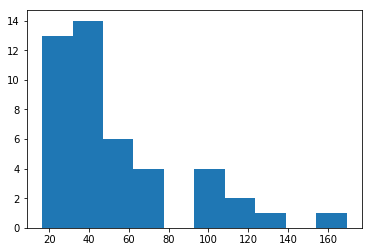

In [36]:
plt.hist(five_votes_time)
plt.show()